# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     2.975830e+01     6.960619e+00
 * time: 0.005043983459472656
     1     2.628627e+01     4.737449e+00
 * time: 0.014358997344970703
     2     1.961706e+01     5.679694e+00
 * time: 0.03640103340148926
     3     1.302595e+01     2.197875e+00
 * time: 0.061509132385253906
     4     1.069937e+01     1.113606e+00
 * time: 0.08336615562438965
     5     1.041286e+01     1.660260e+00
 * time: 0.10108804702758789
     6     1.000847e+01     1.136001e+00
 * time: 0.11780905723571777
     7     9.566310e+00     9.568592e-01
 * time: 0.13489294052124023
     8     9.518710e+00     1.104003e+00
 * time: 0.14737415313720703
     9     9.436728e+00     8.481677e-01
 * time: 0.15978693962097168
    10     9.371988e+00     5.834875e-01
 * time: 0.17332100868225098
    11     9.302283e+00     5.444875e-01
 * time: 0.18571710586547852
    12     9.260457e+00     4.751349e-01
 * time: 0.19832205772399902
    13     9.239027e+00     2.365550e-01
 * ti

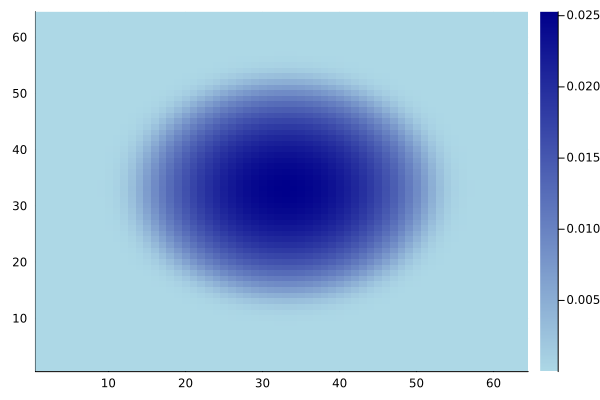

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)